In [24]:
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization


In [3]:
train_dir = r"D:\DataSets\Cat_and_Dog\training_set"
test_dir = r"D:\DataSets\Cat_and_Dog\test_set"

In [30]:
train_data=ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
                             

test_data=ImageDataGenerator(rescale=1./255)

In [27]:
target_size=(128,128)
batch_size=32

In [31]:
train_set=train_data.flow_from_directory(directory=train_dir,target_size=(128,128),batch_size=32,color_mode="rgb",class_mode = 'binary')
validation_set=test_data.flow_from_directory(directory=test_dir,target_size=(128,128),batch_size=30,shuffle=True,class_mode = 'binary',color_mode="rgb")

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


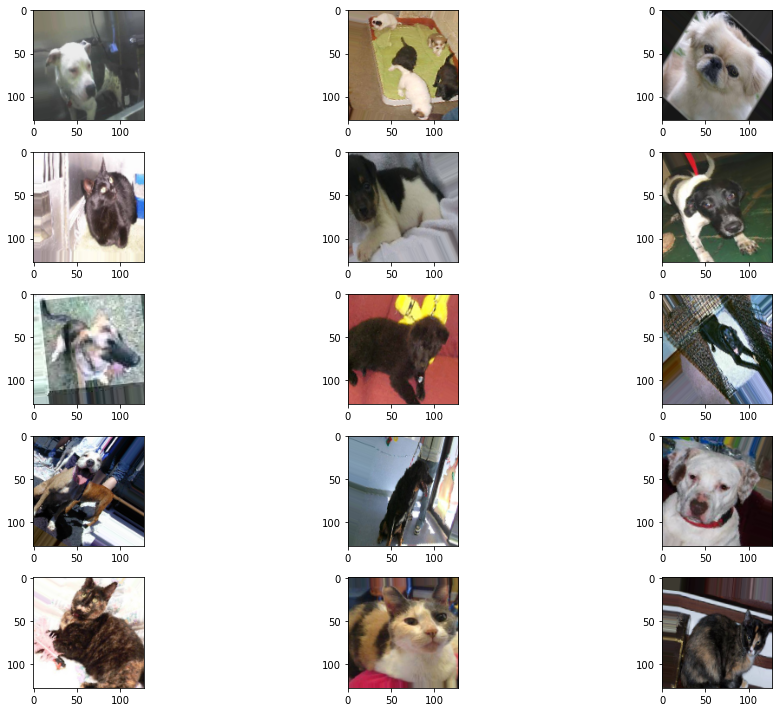

In [9]:
plt.figure(figsize=(15, 10))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for img in next(train_set):
        image = img[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',strides = 2, padding='same'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu',padding= 'same'))
model.add(Conv2D(128,(3,3),activation='relu',strides = 2,padding= 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 128)       73856     
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
model_history=model.fit(train_set,validation_data=validation_set,epochs=10,validation_steps=2000/32)

Epoch 1/10
250/250 [==============================] - 348s 1s/step - loss: 0.6936 - accuracy: 0.5124 - val_loss: 0.6934 - val_accuracy: 0.4995
Epoch 2/10
250/250 [==============================] - 299s 1s/step - loss: 0.6933 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5026
Epoch 3/10
250/250 [==============================] - 302s 1s/step - loss: 0.6933 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 4/10
250/250 [==============================] - 306s 1s/step - loss: 0.6933 - accuracy: 0.4965 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 5/10
250/250 [==============================] - 336s 1s/step - loss: 0.6932 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5021
Epoch 6/10
250/250 [==============================] - 327s 1s/step - loss: 0.6932 - accuracy: 0.4910 - val_loss: 0.6932 - val_accuracy: 0.4979
Epoch 7/10
250/250 [==============================] - 300s 1s/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.4952

In [12]:
cnn = Sequential()

 
cnn.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64, (3, 3)))
cnn.add(Activation('relu'))


cnn.add(Flatten())

cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(1,activation='sigmoid'))

In [13]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history=cnn.fit(train_set,validation_data=validation_set,epochs=10)

Epoch 1/10
250/250 [==============================] - 130s 513ms/step - loss: 0.6973 - accuracy: 0.5195 - val_loss: 0.6855 - val_accuracy: 0.5215
Epoch 2/10
250/250 [==============================] - 135s 541ms/step - loss: 0.6803 - accuracy: 0.5700 - val_loss: 0.6545 - val_accuracy: 0.6055
Epoch 3/10
250/250 [==============================] - 136s 543ms/step - loss: 0.6697 - accuracy: 0.5854 - val_loss: 0.7666 - val_accuracy: 0.5590
Epoch 4/10
250/250 [==============================] - 136s 541ms/step - loss: 0.6550 - accuracy: 0.6006 - val_loss: 0.6086 - val_accuracy: 0.6745
Epoch 5/10
250/250 [==============================] - 136s 544ms/step - loss: 0.6430 - accuracy: 0.6273 - val_loss: 0.5918 - val_accuracy: 0.7010
Epoch 6/10
216/250 [========================>.....] - ETA: 17s - loss: 0.6356 - accuracy: 0.6429

In [ ]:
fig = plt.figure(1, figsize = (8, 8))
fig.suptitle("Sample Cat images from Training Set")

for i in range(25):
    
    plt.subplot(5, 5, i + 1)
    image = load_img(FILES + "train/" + train_df.query("label == 'cat'").file.values[i])
    plt.imshow(image)
    plt.axis("off")
    
plt.tight_layout()
plt.show()

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 30, 
    width_shift_range = 0.1,
    height_shift_range = 0.1, 
    brightness_range = (0.5, 1), 
    zoom_range = 0.2,
    horizontal_flip = True, 
    rescale = 1./255,
)

sample_df = train_data.sample(1)

sample_generator = datagen.flow_from_dataframe(
    dataframe = sample_df,
    directory = FILES + "train/",
    x_col = "file",
    y_col = "label",
    class_mode = "categorical",
    target_size = (224, 224),
    seed = 666
)

plt.figure(figsize = (14, 8))

for i in range(50):
    
    plt.subplot(5, 10, i + 1)
    
    for X, y in validation_set:

        plt.imshow(X[0])
        plt.axis("off")
        break
        
plt.tight_layout()
plt.show()

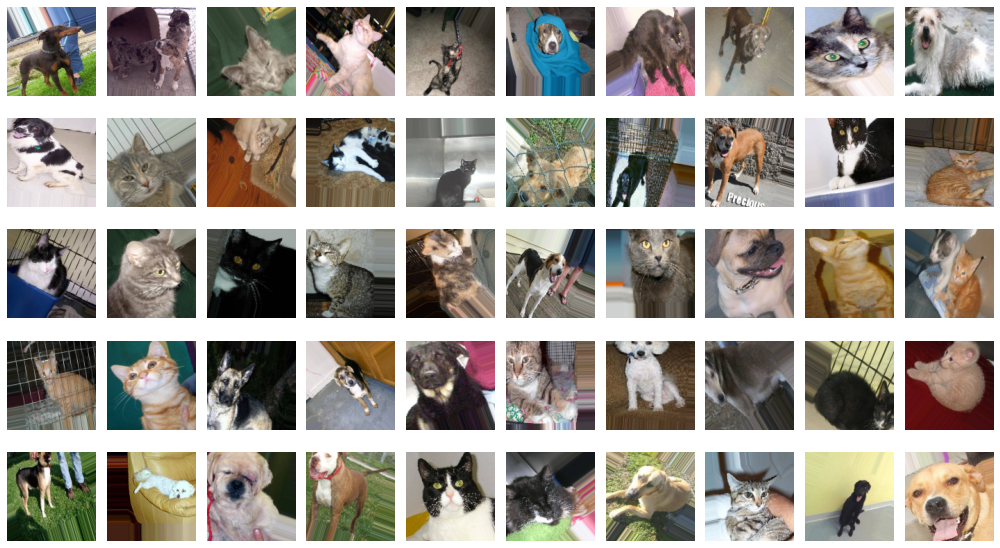

In [32]:
plt.figure(figsize = (14, 8))

for i in range(50):
    
    plt.subplot(5, 10, i + 1)
    
    for X, y in train_set:

        plt.imshow(X[0])
        plt.axis("off")
        break
        
plt.tight_layout()
plt.show()

In [22]:
datagen = ImageDataGenerator(rotation_range = 60)
test_gent = test_data.flow_from_directory(directory=test_dir,target_size=(128,128),batch_size=30,shuffle=True,class_mode = 'binary',color_mode="rgb")


Found 2000 images belonging to 2 classes.


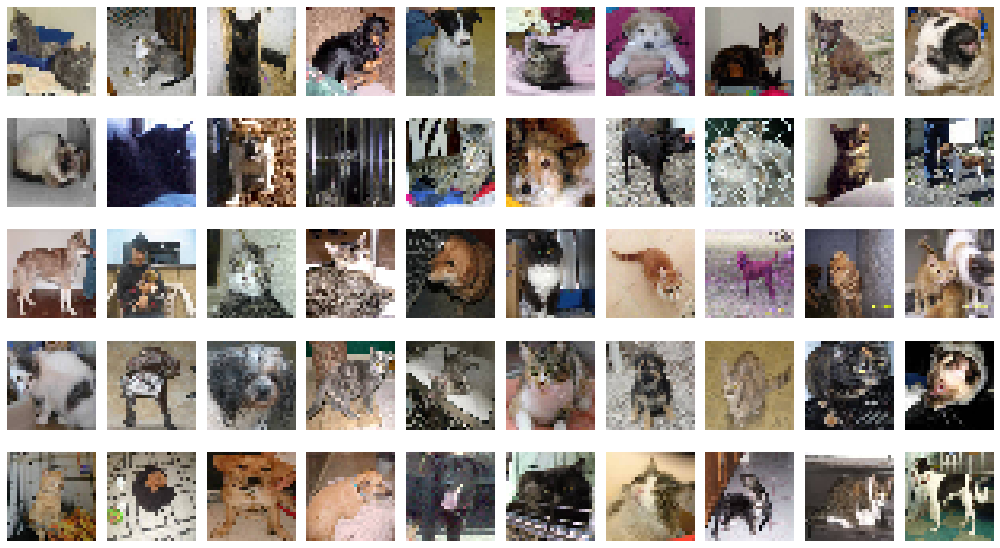

In [23]:
plt.figure(figsize = (14, 8))

for i in range(50):
    
    plt.subplot(5, 10, i + 1)
    
    for X, y in test_gen:

        plt.imshow(X[0])
        plt.axis("off")
        break
        
plt.tight_layout()
plt.show()